In [1]:
import numpy as np
import pandas as pd


In [2]:
data=pd.read_csv(r"C:\Users\sridh\Downloads\Amazon Sales data.csv")

In [3]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
# Parse dates
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Extract year and month from the order date
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month
data['Order Year-Month'] = data['Order Date'].dt.to_period('M')

print(data.head())


                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H 2010-05-28  669165933 2010-06-27        9925   
1        Online              C 2012-08-22  963881480 2012-09-15        2804   
2       Offline              L 2014-05-02  341417157 2014-05-08        1779   
3        Online              C 2014-06-20  514321792 2014-07-05        8102   
4       Offline              L 2013-02-01  115456712 2013-02-06        5062   

   Unit Price  Unit Cost  Total Revenue  Tot

# monthly sales

In [5]:
# Group by month and compute total revenue
monthly_sales = data.groupby(data['Order Date'].dt.to_period('M')).agg({'Total Revenue': 'sum'}).reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()

# Display the month-wise sales trend
print(monthly_sales.head())


  Order Date  Total Revenue
0 2010-02-01     3410661.12
1 2010-05-01     2587973.26
2 2010-06-01     1082418.40
3 2010-10-01     6064933.75
4 2010-11-01     3458252.00


In [7]:
monthly_sales.to_csv('monthly_sales.csv', index=False)

# YEARLY SALES

In [6]:
# Group by year and compute total revenue
yearly_sales = data.groupby('Order Year').agg({'Total Revenue': 'sum'}).reset_index()

# Display the year-wise sales trend
print(yearly_sales.head())



   Order Year  Total Revenue
0        2010    19186024.92
1        2011    11129166.07
2        2012    31898644.52
3        2013    20330448.66
4        2014    16630214.43


In [8]:
yearly_sales.to_csv('yearly_sales.csv', index=False)


In [9]:
# Group by year and month and compute total revenue
yearly_monthly_sales = data.groupby(['Order Year', 'Order Month']).agg({'Total Revenue': 'sum'}).reset_index()

# Save the prepared data to a CSV file for Tableau
yearly_monthly_sales.to_csv('yearly_monthly_sales.csv', index=False)

# Display the yearly month-wise sales trend
print(yearly_monthly_sales.head())


   Order Year  Order Month  Total Revenue
0        2010            2     3410661.12
1        2010            5     2587973.26
2        2010            6     1082418.40
3        2010           10     6064933.75
4        2010           11     3458252.00


In [10]:
# Total profit by item type
item_type_profit = data.groupby('Item Type').agg({'Total Profit': 'sum'}).reset_index()

# Save the prepared data to a CSV file for Tableau
item_type_profit.to_csv('item_type_profit.csv', index=False)

# Display the total profit by item type
print(item_type_profit)


          Item Type  Total Profit
0         Baby Food    3886643.70
1         Beverages     888047.28
2            Cereal    2292443.43
3           Clothes    5233334.40
4         Cosmetics   14556048.66
5            Fruits     120495.18
6         Household    7412605.71
7              Meat     610610.00
8   Office Supplies    5929583.75
9     Personal Care    1220622.48
10           Snacks     751944.18
11       Vegetables    1265819.63


C:\Users\sridh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sridh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


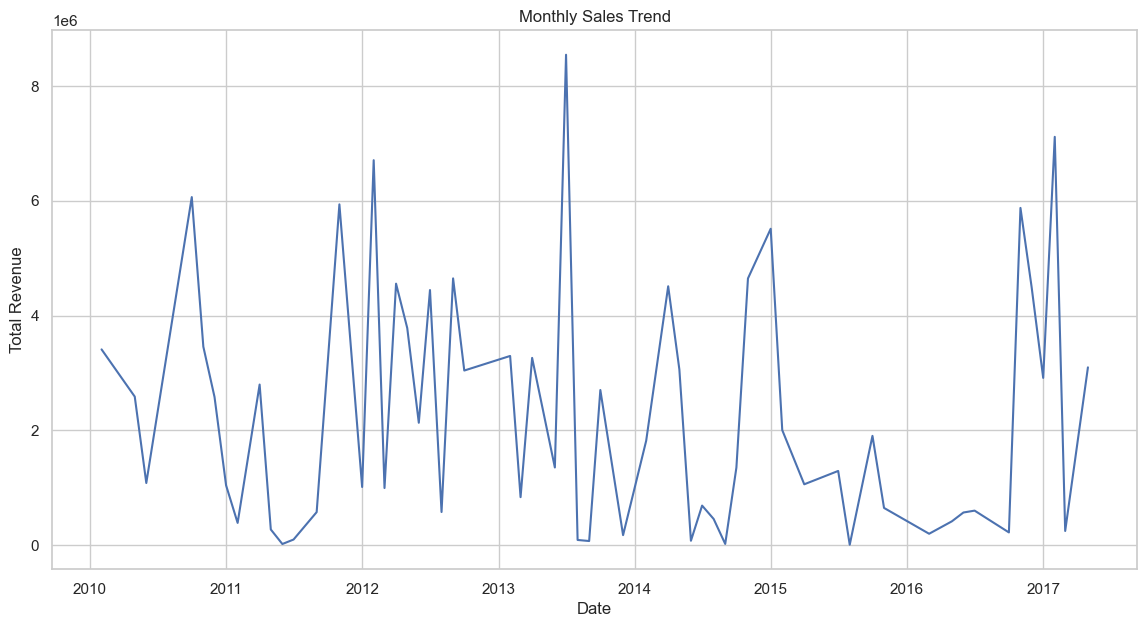

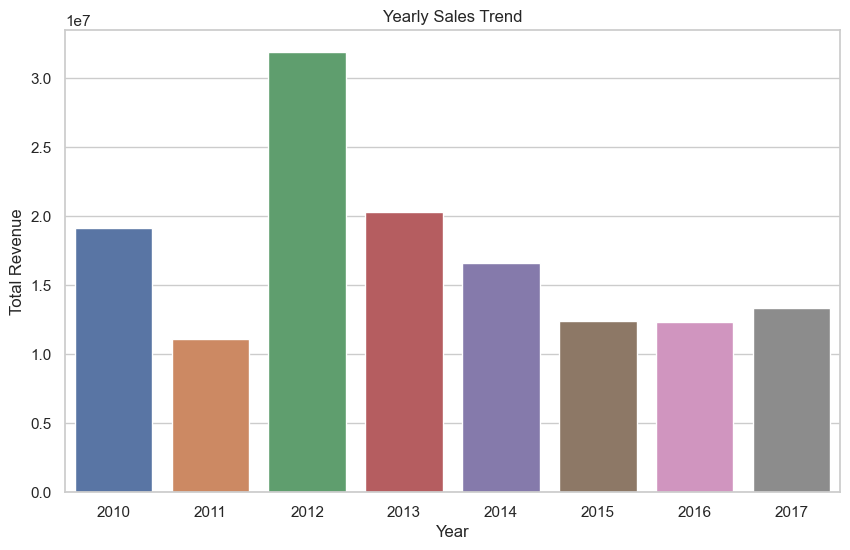

C:\Users\sridh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sridh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


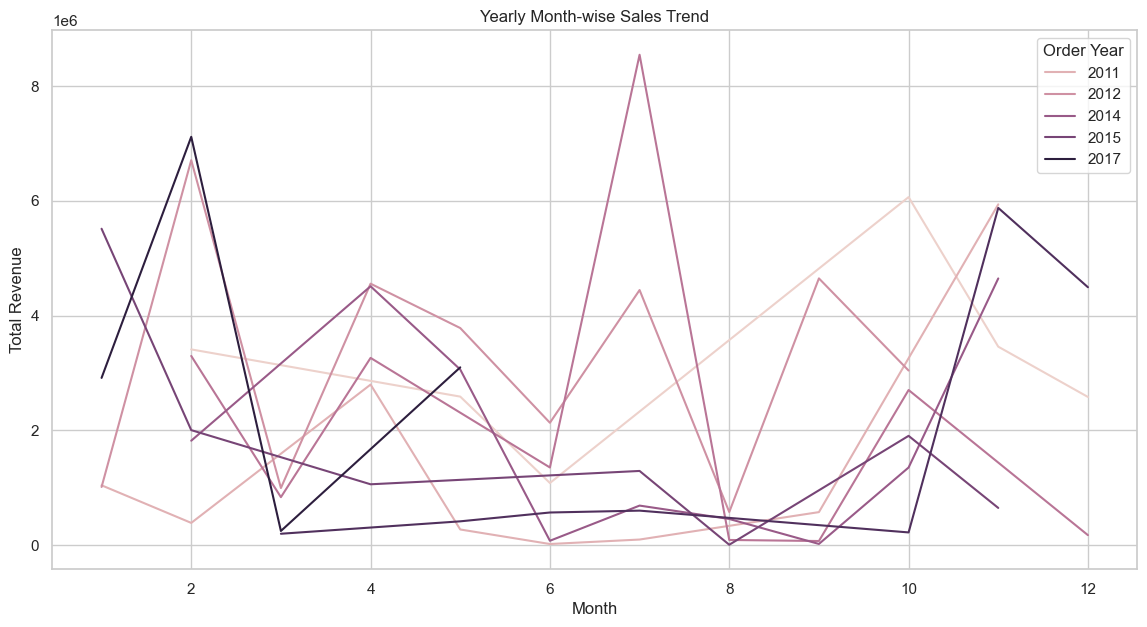

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Monthly Sales Trend
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Order Date', y='Total Revenue')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

# Yearly Sales Trend
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_sales, x='Order Year', y='Total Revenue')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

# Yearly Month-wise Sales Trend
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_monthly_sales, x='Order Month', y='Total Revenue', hue='Order Year')
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()
